# Data Analytics Fundamentals 1st Summative Assessment - Part 1

Having set up a project with a virtual environment, upgrade pip and install pandas.

```python -m pip install --upgrade pip```

```pip --version```

```pip install pandas matplotlib seaborn```

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme()

print("Pandas version:", pd.__version__)


Pandas version: 2.3.3


In [36]:
cc = pd.read_csv("data/customerChurnData.csv")
cc.describe()

,Tenure,LocalCalls,LocalMins,IntlCalls,IntlMins,ExtraInternationalCharges,CustomerServiceCalls,AvgMonthlyGBDownload,ExtraDataCharges,Age,NrCustomers,MonthlyCharges,TotalCharges
count,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000
mean,32.337820,130.974129,322.752864,51.097524,130.070624,33.641783,0.915657,6.696276,3.374458,47.448632,0.837894,31.030357,1083.755645
std,24.595689,121.893966,288.619931,103.592369,243.527828,76.346828,1.411484,7.454339,12.565309,16.969893,1.700780,16.288147,1127.074863
min,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,5.000000,6.000000
25%,9.000000,31.000000,76.900000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,33.000000,0.000000,16.000000,181.000000
50%,29.000000,98.000000,250.500000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,47.000000,0.000000,31.000000,647.000000
75%,55.000000,199.000000,498.050000,52.000000,140.400000,16.400000,2.000000,9.000000,0.000000,60.000000,0.000000,43.000000,1732.500000
max,77.000000,918.000000,1234.200000,1120.000000,1372.500000,585.800000,5.000000,43.000000,99.000000,85.000000,6.000000,78.000000,5574.000000


In [3]:
cc.head()

,CustomerID,Churn,Tenure,LocalCalls,LocalMins,IntlCalls,IntlMins,IntlActive,IntlPlan,ExtraInternationalCharges,...,Age,Under30,Senior,Group,NrCustomers,DeviceProtection&OnlineBackup,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,35,No,No,No,0,No,Month-to-Month,Direct Debit,10,10
1,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,...,49,No,No,No,0,Yes,One Year,Paper Check,21,703
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,No,yes,0.0,...,51,No,No,No,0,Yes,One Year,Direct Debit,23,1014
3,1314-SMPJ,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,...,41,No,No,No,0,No,Month-to-Month,Paper Check,17,177
4,2956-TXCJ,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,...,51,No,No,No,0,No,One Year,Direct Debit,28,1720


### 1. What is the average age of customers who have not churned? (Rounded)

Get only rows where "Churn" == "No"

In [8]:
not_churned = cc[cc["Churn"] == "No"]


Get the average age of this df

In [9]:
ave_age_not_churned = not_churned["Age"].mean()
ave_age_not_churned # => 46.34307912492333

np.float64(46.34307912492333)

In [11]:
print(f"Average rounded age of customers who have not churned is {round(ave_age_not_churned)}") # => 46

Average age of customers who have not churned is 46


### 2. What percentage of customers have an International Plan?

Find the total number of customers and the number who have an international plan

In [17]:

num_customers = cc.shape[0]
print(f"There are {num_customers} customers in total")


There are 6687 customers in total


In [16]:
has_intl_plan = cc[cc["IntlPlan"] == "yes"]
num_with_intl_plan = has_intl_plan.shape[0]
print(f"{num_with_intl_plan} customers have an international plan")


651 customers have an international plan


Extrapolate the percentage

In [21]:
per_with_intl_plan = (num_with_intl_plan / num_customers) * 100
print(f"{per_with_intl_plan:.2f}% of customers have an international plan")

9.74% of customers have an international plan


### 3. What is the median monthly charges for all customers?

In [23]:
cc["MonthlyCharges"].dtype

dtype('int64')

In [26]:
median_monthly_charge = cc["MonthlyCharges"].median()
print(f"The median monthly charge for all customers is {median_monthly_charge}")

The median monthly charge for all customers is 31.0


### 4. Generate a bar chart showing the count of customers who churned vs. those who did not. Which group is larger?

In [30]:
churn_counts = cc["Churn"].value_counts()
churn_counts


Churn
No     4891
Yes    1796
Name: count, dtype: int64

<Axes: xlabel='Churn'>

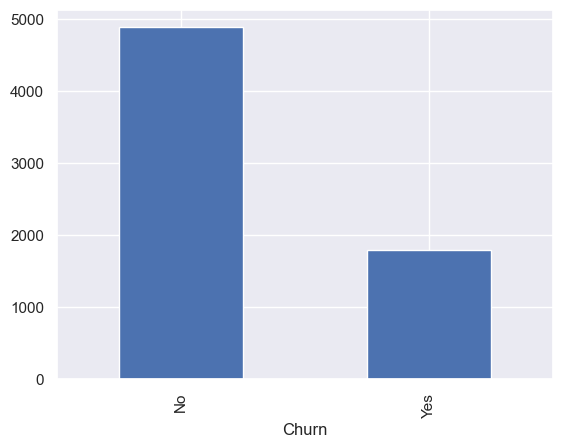

In [31]:
churn_counts.plot(kind="bar")


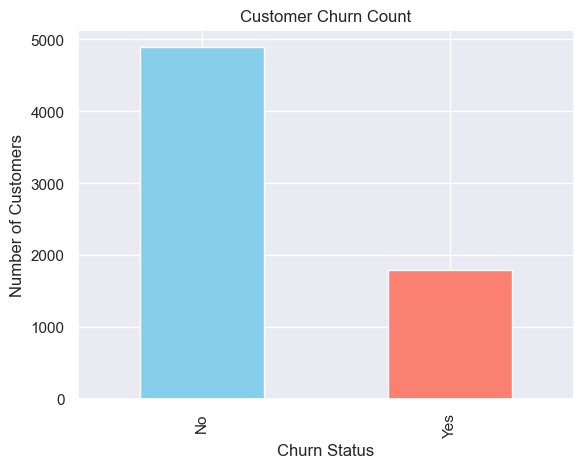

In [32]:
churn_counts.plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Customer Churn Count")
plt.xlabel("Churn Status")
plt.ylabel("Number of Customers")
plt.show()

The group that did not churn ("No") is the larger group

### 5. What is the average number of customer service calls for customers who churned?

First, we get a df for customers who churned

In [34]:
churners = cc[cc["Churn"] == "Yes"]
churners["Churn"].value_counts()

Churn
Yes    1796
Name: count, dtype: int64

Then get the mean number of service calls for that group

In [36]:
ave_serv_calls = churners["CustomerServiceCalls"].mean()
print(f"The average number of service calls for customers who churned is {ave_serv_calls:.2f}")

The average number of service calls for customers who churned is 2.40


### 6. Create a histogram - What is the most common tenure range shown in the histogram?

In [4]:
cc["Tenure"].dtype

dtype('int64')

In [5]:
tenure = cc["Tenure"]
print(f"Tenures range between {tenure.min()} and {tenure.max()} months")

Tenures range between 1 and 77 months


In [19]:
tenure_bin = 8 # sets the number of bins - does not directly control the size of the bins
bin_edges = range(1, 85, 10)  # start=0, stop=81 (exclusive), step=10 - directly controls the size of the bins

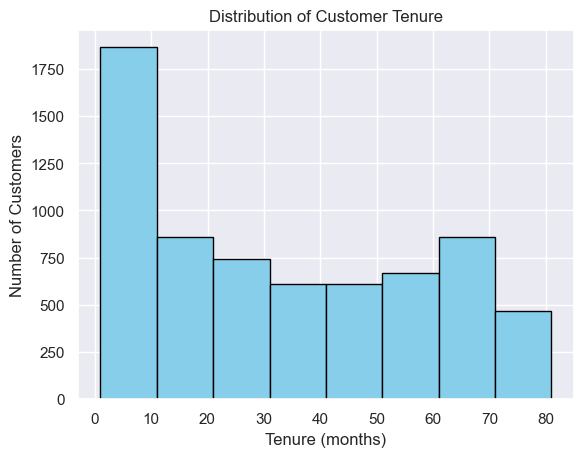

In [20]:
cc["Tenure"].plot(kind="hist", bins=bin_edges, color="skyblue", edgecolor="black")
plt.title("Distribution of Customer Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Number of Customers")
plt.show()


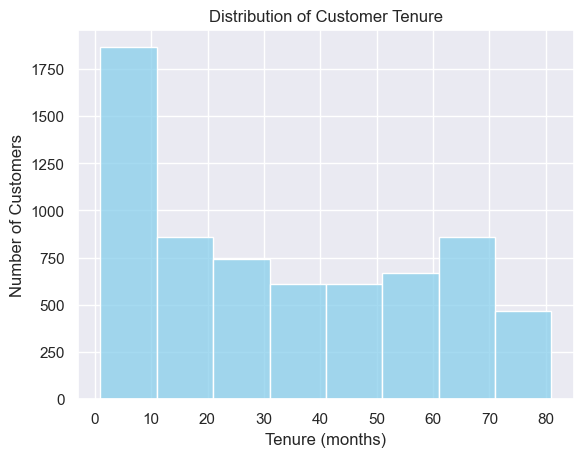

In [21]:
import seaborn as sns
sns.histplot(cc["Tenure"], bins=bin_edges, kde=False, color="skyblue")
plt.title("Distribution of Customer Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Number of Customers")
plt.show()


### 8. Which state has the second highest average number of local calls made?

In [23]:
avg_local_calls = cc.groupby("State")["LocalCalls"].mean()
avg_local_calls

State
AK    121.894231
AL    136.559006
AR    124.172727
AZ    146.343750
CA    139.764706
CO    138.098485
CT    132.621622
DC    140.166667
DE    146.114754
FL    156.448819
GA    138.111111
HI    134.547170
IA    139.311111
ID    141.598639
IL    135.025862
IN    115.125874
KS    113.567376
KY    124.805085
LA    107.766990
MA    133.839695
MD    123.200000
ME    137.153226
MI    113.719178
MN    126.678571
MO    145.244094
MS    126.276923
MT    124.554745
NC    129.455882
ND    145.387097
NE    112.368852
NH    125.026786
NJ    126.189781
NM    139.370968
NV    121.613636
NY    114.850299
OH    125.050633
OK    159.951220
OR    125.730769
PA    114.922222
RI    129.312977
SC    129.108333
SD    117.175000
TN    133.122642
TX    137.531034
UT    149.430556
VA    126.535484
VT    123.727891
WA    129.871212
WI    133.512821
WV    132.056338
WY    142.707792
Name: LocalCalls, dtype: float64

In [24]:
avg_local_calls_sorted = avg_local_calls.sort_values(ascending=False)
avg_local_calls_sorted

State
OK    159.951220
FL    156.448819
UT    149.430556
AZ    146.343750
DE    146.114754
ND    145.387097
MO    145.244094
WY    142.707792
ID    141.598639
DC    140.166667
CA    139.764706
NM    139.370968
IA    139.311111
GA    138.111111
CO    138.098485
TX    137.531034
ME    137.153226
AL    136.559006
IL    135.025862
HI    134.547170
MA    133.839695
WI    133.512821
TN    133.122642
CT    132.621622
WV    132.056338
WA    129.871212
NC    129.455882
RI    129.312977
SC    129.108333
MN    126.678571
VA    126.535484
MS    126.276923
NJ    126.189781
OR    125.730769
OH    125.050633
NH    125.026786
KY    124.805085
MT    124.554745
AR    124.172727
VT    123.727891
MD    123.200000
AK    121.894231
NV    121.613636
SD    117.175000
IN    115.125874
PA    114.922222
NY    114.850299
MI    113.719178
KS    113.567376
NE    112.368852
LA    107.766990
Name: LocalCalls, dtype: float64

In [25]:
second_highest_state = avg_local_calls_sorted.index[1]
second_highest_value = avg_local_calls_sorted.iloc[1]

print(f"The state with the second-highest average number of local calls is {second_highest_state}, with an average of {second_highest_value:.2f} calls.")


The state with the second-highest average number of local calls is FL, with an average of 156.45 calls.


### 9. Which states had 90 customers churning?

In [33]:
churn_counts = cc.groupby("State")["Churn"].value_counts()
print(churn_counts)

State  Churn
AK     No        74
       Yes       30
AL     No       115
       Yes       46
AR     No        83
               ... 
WI     Yes       39
WV     No       156
       Yes       57
WY     No       116
       Yes       38
Name: count, Length: 102, dtype: int64


In [39]:
churners_by_state = cc[cc["Churn"] == "Yes"].groupby("State")["Churn"].count().sort_values(ascending=False)
churners_by_state.sum()

np.int64(1796)

### 10. Create a line chart showing the average international minutes used per month over different ages. Describe the overall trend.

In [40]:
avg_intl_mins_by_age = cc.groupby("Age")["IntlMins"].mean()

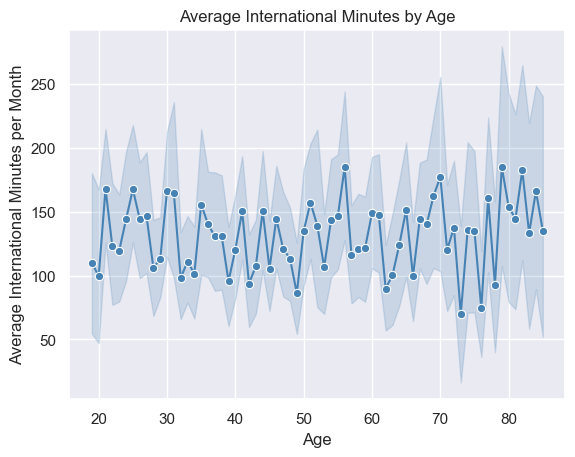

In [42]:
sns.lineplot(x="Age", y="IntlMins", data=cc, estimator="mean", color="steelblue", marker="o")
plt.title("Average International Minutes by Age")
plt.xlabel("Age")
plt.ylabel("Average International Minutes per Month")
plt.show()

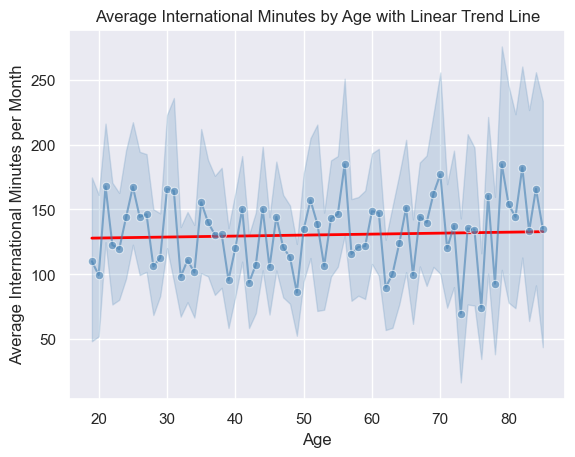

In [43]:
sns.regplot(
    x="Age",
    y="IntlMins",
    data=cc,
    scatter=False,      # no individual scatter points (we’ll just draw the line)
    color="red",        # regression line color
    line_kws={'linewidth': 2},
    ci=None             # remove the shaded confidence interval
)

# Add your original seaborn mean line on top
sns.lineplot(
    x="Age",
    y="IntlMins",
    data=cc,
    estimator="mean",
    color="steelblue",
    marker="o",
    alpha=0.6
)

plt.title("Average International Minutes by Age with Linear Trend Line")
plt.xlabel("Age")
plt.ylabel("Average International Minutes per Month")
plt.show()

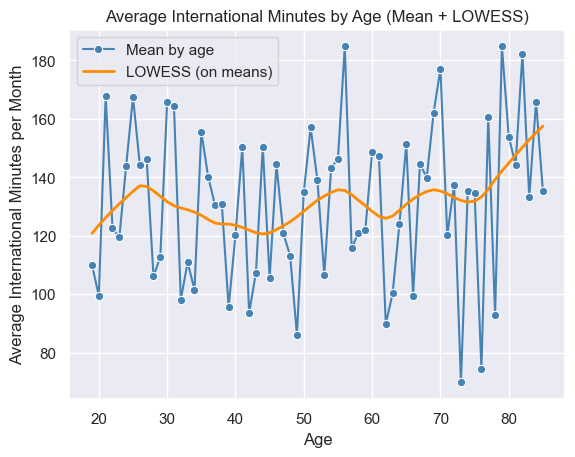

In [51]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# 1) Per-age mean (what lineplot shows)
avg = (
    cc.groupby("Age", as_index=False)["IntlMins"]
      .mean()
      .sort_values("Age")
)

# 2) LOWESS on the aggregated mean (same target as the line plot)
smooth = lowess(avg["IntlMins"], avg["Age"], frac=0.25, return_sorted=True)

# 3) Plot: mean line + LOWESS on the mean
sns.lineplot(data=avg, x="Age", y="IntlMins", color="steelblue", marker="o", label="Mean by age")
plt.plot(smooth[:,0], smooth[:,1], color="darkorange", linewidth=2, label="LOWESS (on means)")
plt.title("Average International Minutes by Age (Mean + LOWESS)")
plt.xlabel("Age")
plt.ylabel("Average International Minutes per Month")
plt.legend()
plt.grid(True)
plt.show()


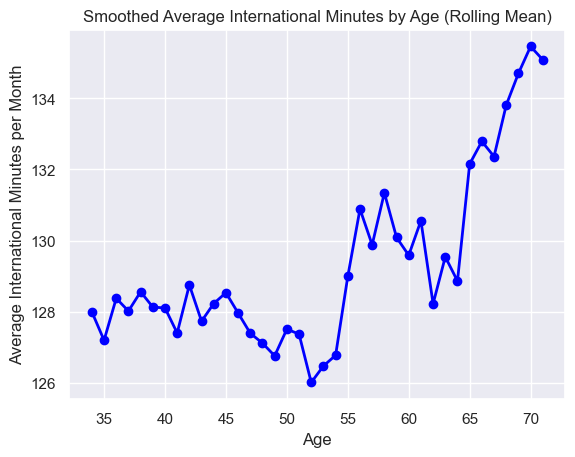

In [50]:
avg_intl_mins = cc.groupby("Age")["IntlMins"].mean().rolling(window=30, center=True).mean()

plt.plot(avg_intl_mins.index, avg_intl_mins.values, color="blue", linewidth=2, marker="o")
plt.title("Smoothed Average International Minutes by Age (Rolling Mean)")
plt.xlabel("Age")
plt.ylabel("Average International Minutes per Month")
plt.grid(True)
plt.show()


### 11. True or False: Males Under 30 churned more than Females under 30

In [58]:
churners = cc[cc["Churn"] == "Yes"]
churners["Churn"].value_counts()

Churn
Yes    1796
Name: count, dtype: int64

In [59]:
churners_under_30 = churners[churners["Age"] < 30]
churners_under_30["Gender"].value_counts()

Gender
Female               158
Male                 137
Prefer not to say      1
Name: count, dtype: int64